<a href="https://colab.research.google.com/github/nyp-sit/sdaai-iti103/blob/master/session-5/plot_learning_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Learning Curves

Welcome to learning curve programming exercise. This is part of a series of exercises to help you to acquire skills in different techniques to fine-tune your machine learning model.

**You will learn how to:**
- Dignose overfitting/underfitting problems in machine learning  
- Plot learning curves for both classification and regression types of problems


## 1. Import Required Packages ##

Let's first import all the packages that you will need during this exercise.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- [pandas](https://pandas.pydata.org) is a library for data analysis

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

%matplotlib inline


## 2. Learning Curve for Regression Problem ##
First, let's get the dataset you will work on. The description of the data can be found [here](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)

In [2]:
# if you are using jupyter notebook and wish to load the data locally
# electricity = pd.read_excel('data/combined_pp.xlsx)
# if you wish to load data from an url
electricity = pd.read_excel('https://github.com/nyp-sit/data/raw/master/combined_pp.xlsx')
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


***Exercise***

Separate the features from the target. Instantiate a LinearRegressor as the estimator to be used later 

In [0]:
# We separate the features and target from the data set
features = ['AT','V','AP','RH']
target = 'PE'

### START CODE HERE ### (3 lines of codes)
X = electricity[features]
y = electricity[target] 

# Instantiate a LinearRegressor
estimator = LinearRegression() 

### START CODE HERE 

`learning_curve()` in scikit-learn can be used to  generate the data (the training and validation scores) needed to plot a learning curve. The function returns a tuple containing three elements: ``train_sizes``, and ``train_scores`` and ``validation_scores``. The function accepts the following parameters:
- estimator — indicates the learning algorithm we use to estimate the true model
- X — the data containing the features
- y — the data containing the target
- train_sizes — the numbers of training examples that will be used to generate the learning curve. If the dtype is float, it is regarded as a fraction of the maximum size of the training set (that is determined by the selected validation method), i.e. it has to be within (0, 1]. (Note: the notation (0,1] means inclusive of 0 but exclusive of 1). Otherwise it is interpreted as absolute sizes of the training sets. 
- cv — determines the cross-validation splitting strategy.
- scoring — controls the metrics used to evaluate estimator. Possible pre-defined metrics can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html)
- shuffle - whether to shuffle training data before taking prefixes of it based on ``train_sizes``.

You can refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) for more detail of the function. 

***Exercise:***

Complete the code below to obtain the train and validation scores. Use a cross-validation fold  of 5. You need to choose an appropriate scoring metric (in our case, `'neg_mean_squared_error'` will be a good choice) for linear regression problem. Set shuffle to ``False``.

There are 9568 rows of data. We set aside 80% of the data for training which is around 7654 samples. We will plot the training curve for training sizes of 1, 100, 500, 2000, 5000, 7654. 


In [0]:
### START CODE HERE ### (~ 1 line of code to call the learning_curve() function with appropriate parameters)

# declare the list of different training sizes
train_sizes = [1, 100, 500, 2000, 5000, 7654]

train_sizes, train_scores, validation_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=5, 
                                                              scoring='neg_mean_squared_error', shuffle=False)

### END CODE HERE ###


***Exercise:***

What do you think are the shapes of the train_scores and test_scores?

<details><summary>Answer</summary>
<p>
Since we specify 6 training sizes, for each training, we specify a 5-fold cross-validations, we should have 6 x 5 train_scores and test_scores.
</p>
</details>

Let us print out the values of train_scores and validation_scores (neg_mean_squared_error). Each row corresponds to a test size and each columns corresponds to a split. 

In [5]:
### Uncomment the following lines ### 

print('Train scores:\n\n', train_scores)
print('\n','-'*70)
print('\nValidation scores:\n\n', validation_scores)

Train scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]

 ----------------------------------------------------------------------

Validation scores:

 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


You might have noticed that some error scores on the training sets are the same. For the row corresponding to training set size of 1, this is expected, but what about other rows? With the exception of the last row, we have a lot of identical values. For instance, take the second row where we have identical values from the second split onward. Why is that so? 

This is caused by not randomizing the training data for each split. Let’s walk through a single example with the aid of the diagram below. When the training size is 500 the first 500 instances in the training set are selected.

For the first split, these 500 instances will be taken from the second chunk. From the second split onward, these 500 instances will be taken from the first chunk. Because we don’t randomize the training set, the 500 instances used for training are the same for the second split onward. This explains the identical values from the second split onward for the 500 training instances case. An identical reasoning applies to the 100 instances case, and a similar reasoning applies to the other cases. 

<div>
<img src="https://github.com/nyp-sit/sdaai-iti103/blob/master/session-5/images/splits.png?raw=1" alt="k-fold" width="500" align='left'/>
</div>



***Exercise:***

You can fix this problem by setting ``shuffle`` to **``True``** in the call to ``learning_curve()``.

In [0]:
### START CODE HERE ###

train_sizes, train_scores, validation_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=5, 
                                                              scoring='neg_mean_squared_error', shuffle=True)

### END CODE HERE ###

To plot the learning curves, we need only a single error score per training set size, not 5. So we will take the mean values of the 5 error scores (for the 5 splits). 
You will notice that the scores (which is negative mean squared error) are negative values. We will need to negate the values. 

***Exercise:*** 

Take the mean (from the 5-splits) of the train_errors and validation_errors and also negate (flip the sign) the mean values to get mean_squared_error (MSE) values.

***Hint:*** 

Use the ``numpy.mean()`` function and specify the correct ``axis``.

In [7]:
### START CODE HERE ###(~ 2 lines of codes)

train_errors_mean = -train_scores.mean(axis=1)
validation_errors_mean = -validation_scores.mean(axis=1)

### END CODE HERE ###

### Uncomment the following to print out the errors ### 
print('Mean training errors:\n', pd.Series(train_errors_mean, index=train_sizes))
print('\n', '-'*50)
print('Mean validation errors:\n', pd.Series(validation_errors_mean, index=train_sizes))

Mean training errors:
 1       -0.000000
100     20.919548
500     21.148416
2000    20.591658
5000    20.838961
7654    20.763731
dtype: float64

 --------------------------------------------------
Mean validation errors:
 1       718.589717
100      22.540309
500      20.983853
2000     20.830219
5000     20.802679
7654     20.794780
dtype: float64



**Expected Output**

Mean training errors:
<div>
<p>
    <table style="width:20%" align="left">
      <tr>
        <td>1</td>
        <td>0.000000</td> 
      </tr>
      <tr>
        <td>100</td>
        <td>18.594403</td> 
      </tr>
        <td>500</td>
        <td>19.339921</td> 
      </tr>
      <tr>
        <td>2000</td>
        <td>20.334249</td> 
      </tr>
      <tr>
        <td>5000</td>
        <td>20.360363</td> 
      <tr>
      <tr>
        <td>7654</td>
        <td>20.764877</td> 
      </tr>
    </table>
</p>
</div>


<div>
<p>
Mean validation errors:
<table style="width:20%" align="left">
  <tr>
    <td>1</td>
    <td>423.372638</td> 
  </tr>
  <tr>
    <td>100</td>
    <td>22.392186</td> 
  </tr>
  <tr>
    <td>500</td>
    <td>20.862362</td> 
  </tr>
  <tr>
    <td>2000</td>
    <td>20.799673</td> 
  </tr>
  <tr>
    <td>5000</td>
    <td>20.360363</td> 
  <tr>
  <tr>
    <td>7654</td>
    <td>20.794924</td> 
  </tr>
</table>
</p>
</div>

Let's define a function ``plot_curve()`` that will plot the train_errors, validation_errors against train_size. 

In [0]:
def plot_curve(title, label, train_sizes, train_scores, validation_scores, ylim=None):
    plt.style.use('seaborn')
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)    
    plt.xlabel("Training size")
    plt.ylabel(label)
    plt.plot(train_sizes, train_scores, 'o-', color="r",
             label="Training")
    plt.plot(train_sizes, validation_scores, 'o-', color="g",
             label="Validation")
    plt.legend(loc="best")

***Exercise:*** 

Plot the learning curve using the above function. You may need to limit the range of y-axis to (0,40) as the MSE for training size of 1 is very large compared to the rest, and we want to see the details of MSEs for other training sizes.

[-0.         20.91954837 21.14841638 20.59165792 20.83896147 20.76373126]
[718.5897173   22.54030891  20.98385262  20.83021936  20.80267912
  20.79477971]


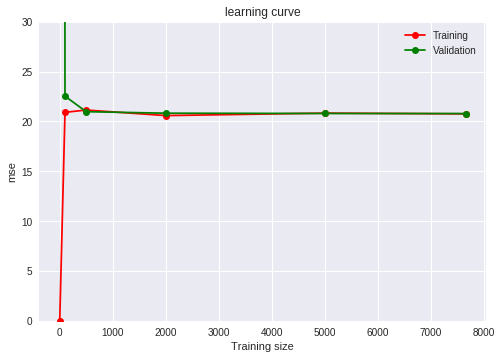

In [13]:
### START CODE HERE ###
print(train_errors_mean)
print(validation_errors_mean)
plot_curve('learning curve', 'mse', train_sizes, train_errors_mean, validation_errors_mean, ylim=(0,30))

### END CODE HERE ###

The validation MSE seems to stagnate at a value of approximately 20. Is this good enough? 

We’d benefit from some domain knowledge.
Technically, that value of 20 has MW (megawatts squared) as units (the units get squared as well when we compute the MSE). The values in our target column are in MW (according to the documentation). Taking the square root of 20 MW results in approximately 4.5 MW. Each target value represents net hourly electrical energy output. So for each hour our model is off by 4.5 MW on average. According to this [Quora](https://www.quora.com/How-can-I-get-an-intuitive-understanding-of-what-a-Kw-Mw-Gw-of-electricity-equates-to-in-real-life-terms) answer, 4.5 MW is equivalent to the heat power produced by 4500 handheld hair dryers. And this would add up if we tried to predict the total energy output for one day or a longer period. We can conclude that the an MSE of 20 MW is quite large. 

***Exercise***:

Examine the learning curve you plot, answer the following questions (don't look at the answer first).

1. Is this a high-bias problem or a low-bias problem?

<details><summary>Answer</summary><p>High Bias</p></details>

2. Is it high variance or low variance?

<details><summary>Answer</summary><p>Low Variance</p></details>

3. Will adding more training data help to improve the performance of the model?

<details><summary>Answer</summary><p>No</p></details>

We can try to reduce the bias with the following methods:
- use a more complex learning algorithm
- add more features (not samples) or try generate polynomial features from existing features
- reduce regularization

Let's try using RandomForestRegressor instead. You don't need to know the details of RandomForestRegressor, and we are just using it to see how it impacts the bias/variance. 

***Exercise:*** 

Complete the code below to plot the learning curve. The steps are similar to the above. 

In [0]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(n_estimators=100)

### START CODE HERE ###

### END CODE HERE ###

***Exercise:***

1. Does the new learning curve show a low or high bias?

<details><summary>Answer</summary><p>Low Bias</p></details>

2. Does the new learning curve show a low or high variance?

<details><summary>Answer</summary><p>High Variance</p></details>

3. Will adding more training data help to improve the performance of the model?

<details><summary>Answer</summary><p>Yes, this may help</p></details>

## 2. Learning Curve for Classification Problem ##

First, let's get the dataset you will work on. The following code will load a "[digits](https://scikit-learn.org/stable/datasets/index.html#digits-dataset)" dataset into variables `X` and `y`. 

In [0]:
digits = load_digits()
X, y = digits.data, digits.target

You have:
    - a numpy-array X that contains your features (the pixel values)
    - a numpy-array Y that contains your labels (digits 0 to 9).

Lets first get a better sense of what our data is like. 

***Exercise:***

How many training examples do you have? In addition, what is the `shape` of the variables `X` and `Y`? 

***Hint***: How do you get the shape of a numpy array? [(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [0]:
### START CODE HERE ### 

shape_X = None
shape_Y = None
m = None

### END CODE HERE ###

### Uncomment the codes below to print out the values ###
#print ('The shape of X is: ' + str(shape_X))
#print ('The shape of Y is: ' + str(shape_Y))
#print ('I have m = %d training examples!' % (m))

**Expected Output**:

<table style="width:40%" align="left">
  <tr>
    <td><b>shape of X</b></td>
    <td>(1797, 64)</td> 
  </tr>
  <tr>
    <td><b>shape of Y</b></td>
    <td>(1797,)</td> 
  </tr>
    <tr>
    <td><b>m</b></td>
    <td>1797</td> 
  </tr>
</table>

Let us visualize some digit in the data set.

***Exercise:***

The original image is a 8 x 8 grey scale image. However, the sample in ``X`` is a numpy array of 64 values. Add codes below to transform the X\[2\] into a 8 x 8 image for plotting.

**Hint**: How do you reshape a numpy array? [(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape)

In [0]:
### START CODE HERE ### 

some_digit = None
label = None 
some_digit_image = None 

### END CODE HERE ###

plt.figure(figsize=(1,1))
plt.imshow(some_digit_image, cmap = plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print('Label = {}'.format(label))


***Exercise:***

Create a cross-validation splits with 50 iterations to get smoother mean test and train
score curves, each time with 20% data randomly selected as a validation set.

**Hint**: Use the [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) in scikit-learn 


In [0]:
### START CODE HERE ### (≈ 1 lines of code)

cv = None 

### END CODE HERE ###

**learning_curve()** expects a param called **train_sizes**, which are numbers of training examples that will be used to generate the learning curve. If the dtype is float, it is regarded as a fraction of the maximum size of the training set (that is determined by the selected validation method), i.e. it has to be within (0, 1]. Otherwise it is interpreted as absolute sizes of the training sets. Note that for classification the number of samples usually have to be big enough to contain at least one sample from each class.

***Exercise:***

Divide the number training samples into 5 equal sizes, starting from 0.1 (i.e. 10% of the training samples). 

**Hint:**
Use [numpy.linspace()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)

In [0]:
### START CODE HERE ### (≈ 1 lines of code)

train_sizes = None 

### END CODE HERE ###

print(train_sizes)

***Exercise:***

Create a LogisticRegression estimator with solver='liblinear' and multi-class='auto' and call the ``learnin_curve()`` function to get the train and validation scores. You can set the ``cv`` param to the cross-validation you created earlier. You need to choose scoring metrics appropriate for classification problem (e.g. 'accuracy')


In [0]:
### START CODE HERE ### (≈ 2 lines of code)

estimator = None 
train_sizes, train_scores, validation_scores = None 

### END CODE HERE ### 
## train_sizes, train_scores, validation_scores = None


***Exercise:***

What do you think are the shapes of the train_scores and test_scores?

<details><summary>Answer</summary>
<p>
Since we specify 5 training sizes, for each training, we specify a 50-fold cross-validations, we should have 5 x 50 train_scores and test_scores.
</p>
</details>

In [0]:
### Uncomment the following to check your answers

#print(train_scores.shape)
#print(validation_scores.shape)

***Exercise:*** 

To plot the learning curves, we need only a single score per training set size, not 50. To do this we need to take the mean value of 50 scores of each training/validation round. As the scores is the accuracy scores, you will need to convert them to error rate. 

***Hint:***  Fraction of error = 1.0 - (fraction of correct)

In [0]:
### START CODE HERE ### (~ 2 lines of code)

train_errors_mean = None 
validation_errors_mean = None 

### END CODE HERE ###


### Plot the learning curve ###
Ok, now we can start plotting the curve. You should expect to see a learning curve similar to the following:

<img src="https://github.com/nyp-sit/sdaai-iti103/blob/master/session-5/images/classification_lc.png?raw=1" alt="classification learning curve" width="300"/>

***Exercise:***

Plot the learning curve for logistic regression. 

In [0]:
### START CODE HERE ### (1 lines of code)

### END CODE HERE ### 


***Exercise:***

Is this a high-bias or high variance problem?
<details><summary>Answer</summary><p>High variance</p></details>


Let us try a more complex non-linear algorithm such as Support Vector Machine (SVM). 
You don't need to know the details of SVM, and we are just using it to see how it impacts the bias/variance. 

As SVC takes longer to train, we reduce the split to 10 to speed-up the training time. 

***Exercise:***

Complete the code below to plot the learning curve for SVM. 

In [0]:
from sklearn.svm import SVC

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)

### START CODE HERE ### (~ 4 lines of code)


### END CODE HERE ### 

***Exercise:***

How does the use of SVM affect the bias of the model?

<details><summary>Answer</summary><p>Using a more complex, non-linear algoritm such as SVM improves the bias of the model</p></details>